In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting import Backtest

C:\Users\antho\Anaconda3\lib\site-packages\backtesting\_plotting.py:44: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [4]:
sp_df = yf.download('^GSPC', 
                      start='2011-09-13', 
                      end='2019-12-13', 
                      progress=False,interval='1d')
ohlc = sp_df.iloc[:,:4]
ohlc

,Open,High,Low,Close
Date,,,,
2011-09-12,1153.500000,1162.520020,1136.069946,1162.270020
2011-09-13,1162.589966,1176.410034,1157.439941,1172.869995
2011-09-14,1173.319946,1202.380005,1162.729980,1188.680054
2011-09-15,1189.439941,1209.109985,1189.439941,1209.109985
2011-09-16,1209.209961,1220.060059,1204.459961,1216.010010
...,...,...,...,...
2019-12-06,3134.620117,3150.600098,3134.620117,3145.909912
2019-12-09,3141.860107,3148.870117,3135.459961,3135.959961
2019-12-10,3135.360107,3142.120117,3126.090088,3132.520020


# Simple Moving Average

In [5]:
def SMA(values,n):
    return pd.Series(values).rolling(n).mean()

In [6]:
class SmaCross(Strategy):
    
    n1 = 50
    n2 = 200
    
    def init(self):
        # Precompute two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
    
    def next(self):
        # If sma1 crosses above sma2, buy the asset
        if crossover(self.sma1, self.sma2):
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif crossover(self.sma2, self.sma1):
            self.sell()

In [7]:
bt = Backtest(ohlc,SmaCross,cash=10000)

In [8]:
bt.run()

Start                     2011-09-12 00:00:00
End                       2019-12-12 00:00:00
Duration                   3013 days 00:00:00
Exposure [%]                          43.4783
Equity Final [$]                      10840.5
Equity Peak [$]                       12015.7
Return [%]                             8.4046
Buy & Hold Return [%]                 172.619
Max. Drawdown [%]                    -22.0962
Avg. Drawdown [%]                    -3.38424
Max. Drawdown Duration      753 days 00:00:00
Avg. Drawdown Duration       81 days 00:00:00
# Trades                                    5
Win Rate [%]                               20
Best Trade [%]                        25.8651
Worst Trade [%]                      -9.04649
Avg. Trade [%]                       0.374505
Max. Trade Duration         958 days 00:00:00
Avg. Trade Duration         262 days 00:00:00
Expectancy [%]                        9.97153
SQN                                -0.0645089
Sharpe Ratio                      

In [9]:
bt.plot()

In [10]:
data, heat = bt.optimize('Sharpe Ratio',n1=range(1,50,2),n2=range(1,50,2),constraint=lambda p: p.n1<p.n2,return_heatmap=True)

In [11]:
data

Start                       2011-09-12 00:00:00
End                         2019-12-12 00:00:00
Duration                     3013 days 00:00:00
Exposure [%]                            95.7186
Equity Final [$]                        15722.3
Equity Peak [$]                           18194
Return [%]                              57.2235
Buy & Hold Return [%]                   172.619
Max. Drawdown [%]                      -21.6291
Avg. Drawdown [%]                      -2.08107
Max. Drawdown Duration        868 days 00:00:00
Avg. Drawdown Duration         36 days 00:00:00
# Trades                                     63
Win Rate [%]                            53.9683
Best Trade [%]                           13.418
Worst Trade [%]                        -10.9845
Avg. Trade [%]                         0.749233
Max. Trade Duration           184 days 00:00:00
Avg. Trade Duration            46 days 00:00:00
Expectancy [%]                          2.42548
SQN                                     

In [12]:
heat.sort_values()
hmap = heat.groupby(['n1','n2']).mean().unstack()
hmap

n2,3,5,7,9,11,13,15,17,19,21,...,31,33,35,37,39,41,43,45,47,49
n1,,,,,,,,,,,,,,,,,,,,,
1,0.006802,-0.020688,-0.038691,-0.053840,-0.046329,-0.064235,-0.058860,-0.045281,-0.083064,-0.085145,...,-0.107639,-0.130349,-0.097141,-0.107304,-0.094336,-0.121985,-0.141418,-0.157122,-0.161787,-0.176560
3,NaN,-0.004207,-0.028585,-0.050317,-0.057142,-0.054151,-0.094917,-0.050828,-0.081599,-0.122934,...,-0.106073,-0.146234,-0.156593,-0.138114,-0.144872,-0.137028,-0.145009,-0.150035,-0.111608,-0.132893
5,NaN,NaN,-0.070341,-0.077096,-0.148935,-0.116802,-0.133863,-0.134470,-0.151633,-0.217026,...,-0.102440,-0.112446,-0.153553,-0.167648,-0.146925,-0.171984,-0.145972,-0.166317,-0.139729,-0.152544
7,NaN,NaN,NaN,-0.072240,-0.120864,-0.165352,-0.142598,-0.134495,-0.068651,-0.102208,...,-0.057749,-0.024436,-0.054370,-0.103799,-0.135536,-0.142963,-0.156234,-0.127176,-0.148634,-0.163884
9,NaN,NaN,NaN,NaN,-0.110206,-0.117351,-0.133812,-0.127397,-0.132066,-0.126809,...,0.008598,-0.026538,-0.104947,-0.091580,-0.106399,-0.107894,-0.069617,-0.051314,-0.106330,-0.115120
11,NaN,NaN,NaN,NaN,NaN,-0.098714,-0.069932,-0.135008,-0.161745,-0.099835,...,-0.029141,-0.053521,-0.011440,-0.055021,-0.026023,-0.013676,-0.032248,-0.016028,-0.049621,-0.010634
13,NaN,NaN,NaN,NaN,NaN,NaN,-0.088898,-0.123959,-0.120602,-0.043664,...,-0.035752,-0.012254,-0.013622,0.056113,0.045202,0.011126,0.059760,0.052042,0.008274,0.002198
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.170881,-0.101641,0.037956,...,0.018949,0.035021,0.063312,0.096839,0.031307,0.022548,0.051950,0.095616,0.070796,0.024316
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004812,0.061057,...,0.109684,0.127315,0.029392,-0.023353,-0.038401,0.021539,0.032357,-0.002899,0.012948,0.054407


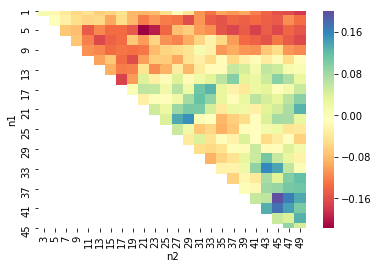

In [13]:
sns.heatmap(hmap, cmap='Spectral')

In [14]:
tr = hmap.stack()

n1 = [i[0] for i in tr.index]
n2 = [i[1] for i in tr.index]

val = []
for (i,j) in zip(n1,n2):
    if i<j:
        val.append(tr.loc[i,j])

In [15]:
import scipy.interpolate as interp
import numpy as np

In [16]:
px, py = np.meshgrid(np.linspace(np.min(n1),np.max(n1),100),np.linspace(np.min(n2),np.max(n2),100))
pz = interp.griddata((n1,n2),val,(px,py),method='cubic')

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

C:\Users\antho\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\antho\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


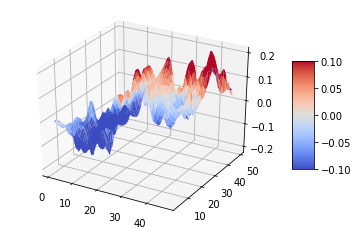

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(px,py,pz,cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Exponential Moving Average

In [19]:
def EMA(val,n):
    res = pd.Series(val).copy()
    return res.ewm(span=n,adjust=False).mean()

In [20]:
class EmaCross(Strategy):
    
    n1 = 37
    n2 = 46
    
    def init(self):
        # Precompute two moving averages
        self.ema1 = self.I(EMA, self.data.Close, self.n1)
        self.ema2 = self.I(EMA, self.data.Close, self.n2)
        
    def next(self):
        # If sma1 crosses above ema2, buy the asset
        if crossover(self.ema1, self.ema2):
            self.buy()

        # Else, if ema1 crosses below ema2, sell it
        elif crossover(self.ema2, self.ema1):
            self.sell()

In [21]:
bt = Backtest(ohlc,EmaCross,cash=10000)

In [22]:
bt.run()

Start                     2011-09-12 00:00:00
End                       2019-12-12 00:00:00
Duration                   3013 days 00:00:00
Exposure [%]                          96.0504
Equity Final [$]                      12547.5
Equity Peak [$]                       12957.3
Return [%]                            25.4748
Buy & Hold Return [%]                 172.619
Max. Drawdown [%]                     -23.287
Avg. Drawdown [%]                    -2.97729
Max. Drawdown Duration     1205 days 00:00:00
Avg. Drawdown Duration       74 days 00:00:00
# Trades                                   23
Win Rate [%]                          39.1304
Best Trade [%]                        29.9705
Worst Trade [%]                      -10.2289
Avg. Trade [%]                        1.04823
Max. Trade Duration         664 days 00:00:00
Avg. Trade Duration         126 days 00:00:00
Expectancy [%]                         5.5142
SQN                                  0.465058
Sharpe Ratio                      

In [23]:
bt.plot()

In [24]:
data, heat = bt.optimize('Sharpe Ratio',n1=range(1,50,2),n2=range(1,50,2),constraint=lambda p: p.n1<p.n2,return_heatmap=True)

In [25]:
data

Start                       2011-09-12 00:00:00
End                         2019-12-12 00:00:00
Duration                     3013 days 00:00:00
Exposure [%]                            96.1832
Equity Final [$]                        14965.4
Equity Peak [$]                         16512.8
Return [%]                               49.654
Buy & Hold Return [%]                   172.619
Max. Drawdown [%]                      -20.1087
Avg. Drawdown [%]                      -2.30397
Max. Drawdown Duration       1167 days 00:00:00
Avg. Drawdown Duration         52 days 00:00:00
# Trades                                     25
Win Rate [%]                                 44
Best Trade [%]                          32.8437
Worst Trade [%]                        -6.51226
Avg. Trade [%]                          1.70828
Max. Trade Duration           664 days 00:00:00
Avg. Trade Duration           116 days 00:00:00
Expectancy [%]                          5.11367
SQN                                    0

In [26]:
heat.sort_values()
hmap = heat.groupby(['n1','n2']).mean().unstack()
hmap

n2,3,5,7,9,11,13,15,17,19,21,...,31,33,35,37,39,41,43,45,47,49
n1,,,,,,,,,,,,,,,,,,,,,
1,-0.019807,-0.044162,-0.017184,-0.056791,-0.048684,-0.039170,-0.024724,-0.044453,-0.046433,-0.070906,...,-0.072534,-0.087542,-0.102769,-0.130098,-0.124010,-0.113023,-0.144708,-0.159380,-0.179678,-0.169043
3,NaN,-0.032614,0.006839,-0.032328,-0.010226,-0.058797,-0.067633,-0.126491,-0.131660,-0.149697,...,-0.171179,-0.162141,-0.149526,-0.165240,-0.165056,-0.196749,-0.176531,-0.190459,-0.192740,-0.194149
5,NaN,NaN,-0.015753,-0.053919,-0.121722,-0.150923,-0.159504,-0.148429,-0.193609,-0.180777,...,-0.198399,-0.215855,-0.204282,-0.220449,-0.218253,-0.199442,-0.193128,-0.184814,-0.172894,-0.168902
7,NaN,NaN,NaN,-0.167420,-0.188963,-0.167142,-0.170181,-0.177085,-0.164218,-0.167011,...,-0.189467,-0.192973,-0.218176,-0.216156,-0.226955,-0.226714,-0.225692,-0.212125,-0.184438,-0.207520
9,NaN,NaN,NaN,NaN,-0.172386,-0.182880,-0.178693,-0.128948,-0.145044,-0.168146,...,-0.199173,-0.218982,-0.239019,-0.259731,-0.253033,-0.241327,-0.208342,-0.182583,-0.141301,-0.104937
11,NaN,NaN,NaN,NaN,NaN,-0.169368,-0.135646,-0.115946,-0.142555,-0.143040,...,-0.220001,-0.259929,-0.226503,-0.202167,-0.162134,-0.116940,-0.132344,-0.100926,-0.108154,-0.076420
13,NaN,NaN,NaN,NaN,NaN,NaN,-0.136967,-0.151790,-0.145804,-0.128305,...,-0.199478,-0.143109,-0.104434,-0.088041,-0.115170,-0.144333,-0.153976,-0.142896,-0.127378,-0.112435
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.145805,-0.123969,-0.179607,...,-0.083851,-0.078146,-0.064540,-0.144622,-0.127925,-0.143917,-0.142541,-0.094105,-0.095971,-0.043302
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.207742,-0.237051,...,-0.058977,-0.067070,-0.112105,-0.132744,-0.155665,-0.122553,-0.095275,-0.044226,0.018148,0.053460


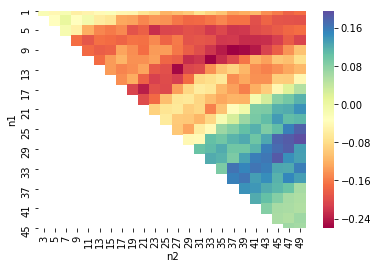

In [27]:
sns.heatmap(hmap, cmap='Spectral')

In [28]:
tr = hmap.stack()

n1 = [i[0] for i in tr.index]
n2 = [i[1] for i in tr.index]

val = []
for (i,j) in zip(n1,n2):
    if i<j:
        val.append(tr.loc[i,j])

In [29]:
px, py = np.meshgrid(np.linspace(np.min(n1),np.max(n1),100),np.linspace(np.min(n2),np.max(n2),100))
pz = interp.griddata((n1,n2),val,(px,py),method='cubic')

C:\Users\antho\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  This is separate from the ipykernel package so we can avoid doing imports until


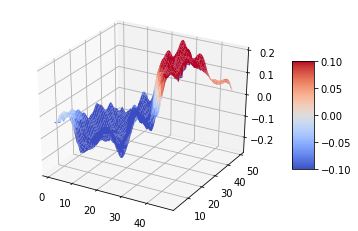

In [30]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(px,py,pz,cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Double Exponential Moving Average

In [31]:
def DEMA(val,n):
    exp1 = EMA(val,n)
    exp2 = EMA(exp1,n)
    return 2*exp1 - exp2

In [32]:
class DemaCross(Strategy):
    
    n1 = 37
    n2 = 46
    
    def init(self):
        # Precompute two moving averages
        self.dema1 = self.I(DEMA, self.data.Close, self.n1)
        self.dema2 = self.I(DEMA, self.data.Close, self.n2)
        
    def next(self):
        # If sma1 crosses above ema2, buy the asset
        if crossover(self.dema1, self.dema2):
            self.buy()

        # Else, if ema1 crosses below ema2, sell it
        elif crossover(self.dema2, self.dema1):
            self.sell()

In [33]:
bt = Backtest(ohlc,DemaCross,cash=10000)

In [34]:
bt.run()

Start                     2011-09-12 00:00:00
End                       2019-12-12 00:00:00
Duration                   3013 days 00:00:00
Exposure [%]                          97.6435
Equity Final [$]                      7132.61
Equity Peak [$]                       10282.7
Return [%]                           -28.6739
Buy & Hold Return [%]                 172.619
Max. Drawdown [%]                    -39.8674
Avg. Drawdown [%]                    -39.8674
Max. Drawdown Duration     2992 days 00:00:00
Avg. Drawdown Duration     2992 days 00:00:00
# Trades                                   63
Win Rate [%]                          28.5714
Best Trade [%]                         9.4911
Worst Trade [%]                      -8.54357
Avg. Trade [%]                      -0.553061
Max. Trade Duration         146 days 00:00:00
Avg. Trade Duration          47 days 00:00:00
Expectancy [%]                        3.07036
SQN                                  -1.38335
Sharpe Ratio                      

In [35]:
bt.plot()

In [36]:
data, heat = bt.optimize('Sharpe Ratio',n1=range(1,50,2),n2=range(1,50,2),constraint=lambda p: p.n1<p.n2,return_heatmap=True)

data

Start                       2011-09-12 00:00:00
End                         2019-12-12 00:00:00
Duration                     3013 days 00:00:00
Exposure [%]                            99.6017
Equity Final [$]                        11419.8
Equity Peak [$]                         11744.8
Return [%]                              14.1975
Buy & Hold Return [%]                   172.619
Max. Drawdown [%]                      -22.6675
Avg. Drawdown [%]                        -3.391
Max. Drawdown Duration       2819 days 00:00:00
Avg. Drawdown Duration        200 days 00:00:00
# Trades                                    380
Win Rate [%]                            32.3684
Best Trade [%]                          9.19577
Worst Trade [%]                        -3.55157
Avg. Trade [%]                        0.0472713
Max. Trade Duration            41 days 00:00:00
Avg. Trade Duration             8 days 00:00:00
Expectancy [%]                          1.08991
SQN                                    0

In [37]:
heat.sort_values()
hmap = heat.groupby(['n1','n2']).mean().unstack()
hmap

n2,3,5,7,9,11,13,15,17,19,21,...,31,33,35,37,39,41,43,45,47,49
n1,,,,,,,,,,,,,,,,,,,,,
1,-0.020936,-0.043070,-0.019294,-0.025497,-0.010523,0.006820,0.005871,-0.008549,0.018708,0.026834,...,-0.026765,-0.034630,-0.027684,-0.050263,-0.030519,-0.031457,-0.057188,-0.053627,-0.045483,-0.041664
3,NaN,-0.020535,-0.040285,-0.031351,-0.035546,-0.014818,-0.026127,-0.034292,-0.011661,-0.016626,...,-0.042713,-0.022521,-0.019056,-0.033070,-0.014190,-0.025763,-0.017130,-0.006410,-0.020251,-0.017750
5,NaN,NaN,-0.065191,-0.030796,-0.035108,-0.064554,-0.069604,-0.044509,-0.022388,-0.037376,...,-0.051812,-0.053178,-0.039528,-0.045327,-0.032448,-0.030877,-0.042742,-0.037157,-0.062348,-0.061389
7,NaN,NaN,NaN,-0.045258,-0.045587,-0.009515,-0.015136,-0.025122,-0.065730,-0.067946,...,-0.061976,-0.052598,-0.037169,-0.051415,-0.073266,-0.064160,-0.079122,-0.070674,-0.027419,-0.056073
9,NaN,NaN,NaN,NaN,-0.021596,-0.036625,-0.047753,-0.067803,-0.078126,-0.037890,...,-0.082912,-0.077602,-0.080345,-0.084938,-0.072189,-0.063579,-0.062630,-0.046763,-0.067668,-0.078886
11,NaN,NaN,NaN,NaN,NaN,-0.028830,-0.038971,-0.048558,-0.067931,-0.072843,...,-0.022144,-0.042482,-0.035461,-0.022440,-0.067194,-0.031172,-0.033565,-0.039902,-0.041737,-0.066397
13,NaN,NaN,NaN,NaN,NaN,NaN,-0.062537,-0.053677,-0.056553,-0.095825,...,-0.026652,-0.048049,-0.052179,-0.039176,-0.029591,-0.070215,-0.071239,-0.081277,-0.060164,-0.040345
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.062269,-0.065171,-0.080088,...,-0.045198,-0.026554,-0.028821,-0.068024,-0.073250,-0.058213,-0.086686,-0.101208,-0.103085,-0.104375
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.076016,-0.016845,...,-0.040019,-0.090006,-0.060005,-0.048195,-0.072867,-0.080698,-0.098660,-0.135250,-0.150626,-0.178540


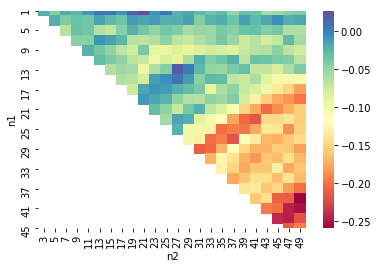

In [38]:
sns.heatmap(hmap, cmap='Spectral')

C:\Users\antho\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  app.launch_new_instance()


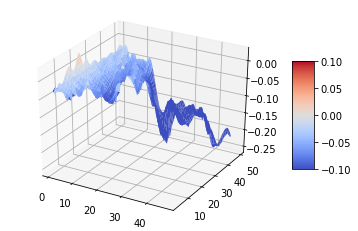

In [39]:
tr = hmap.stack()

n1 = [i[0] for i in tr.index]
n2 = [i[1] for i in tr.index]

val = []
for (i,j) in zip(n1,n2):
    if i<j:
        val.append(tr.loc[i,j])

px, py = np.meshgrid(np.linspace(np.min(n1),np.max(n1),100),np.linspace(np.min(n2),np.max(n2),100))
pz = interp.griddata((n1,n2),val,(px,py),method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(px,py,pz,cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()